In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
ebay_df = pd.read_csv('auction.csv')

## Average number of bids

In [3]:
ebay_df = ebay_df.dropna()
ebay_df = ebay_df.groupby('auctionid').size().reset_index(name='count')

In [4]:
average = ebay_df['count'].mean()

In [5]:
ebay_df

,auctionid,count
0,1638843936,7
1,1638844284,2
2,1638844464,16
3,1638844729,11
4,1638893549,5
...,...,...
622,8215558653,14
623,8215571039,20
624,8215582227,16
625,8215605488,11


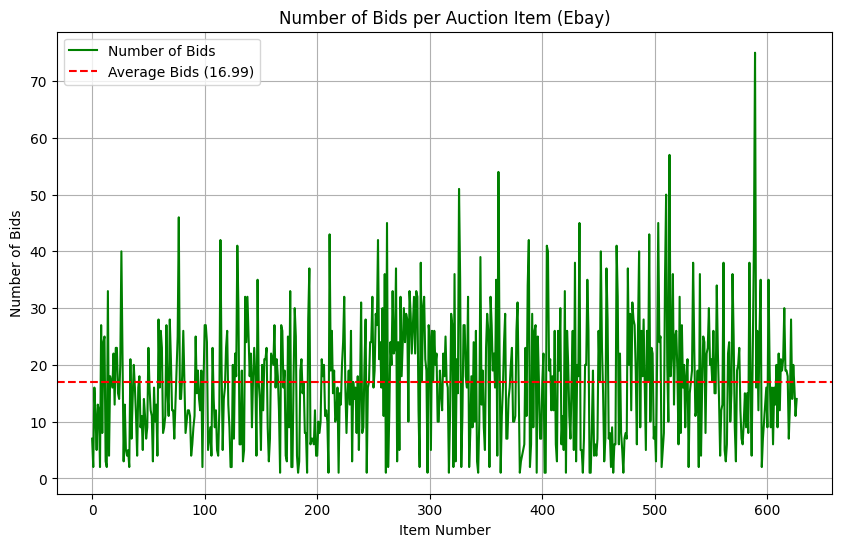

In [6]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(range(len(ebay_df)), ebay_df['count'], color="green", label='Number of Bids')
# Calculate the average number of bids
average_bids = ebay_df['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item (Ebay)')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

In [7]:
ebay_df


,auctionid,count
0,1638843936,7
1,1638844284,2
2,1638844464,16
3,1638844729,11
4,1638893549,5
...,...,...
622,8215558653,14
623,8215571039,20
624,8215582227,16
625,8215605488,11


In [8]:
# Export the dataframe to a csv file
ebay_df.to_csv('auction_bids.csv', index=False)

## Comparing number of bids to remaining time

In [9]:
# Reload the original dataframe
ebay_df = pd.read_csv('auction.csv')

# Drop missing values
ebay_df = ebay_df.dropna()

# Show counts by groupby
counts_df = ebay_df.groupby('auction_type').size().reset_index(name='count')
counts_df

,auction_type,count
0,3 day auction,2019
1,5 day auction,1617
2,7 day auction,7018


In [10]:
auctions_3_days = ebay_df.where(ebay_df['auction_type'].str.contains("3 day auction"))
auctions_5_days = ebay_df.where(ebay_df['auction_type'].str.contains("5 day auction"))
auctions_7_days = ebay_df.where(ebay_df['auction_type'].str.contains("7 day auction"))

3 days:         auctionid  count
0    1.638894e+09      5
1    1.639454e+09     33
2    1.641142e+09      5
3    1.642244e+09     11
4    1.643076e+09     16
..            ...    ...
143  8.215559e+09     14
144  8.215571e+09     20
145  8.215582e+09     16
146  8.215605e+09     11
147  8.215611e+09     14

[148 rows x 2 columns]
5 days:        auctionid  count
0   1.639826e+09     18
1   1.640257e+09     13
2   1.640495e+09     23
3   1.640809e+09     20
4   1.640809e+09     40
..           ...    ...
91  8.215002e+09     19
92  8.215125e+09     19
93  8.215129e+09     18
94  8.215146e+09      7
95  8.215188e+09     13

[96 rows x 2 columns]
7 days:         auctionid  count
0    1.638844e+09      7
1    1.638844e+09      2
2    1.638844e+09     16
3    1.638845e+09     11
4    1.638918e+09     13
..            ...    ...
378  8.214824e+09     20
379  8.214862e+09      9
380  8.214864e+09     22
381  8.214864e+09     12
382  8.214889e+09     21

[383 rows x 2 columns]


<BarContainer object of 1 artists>

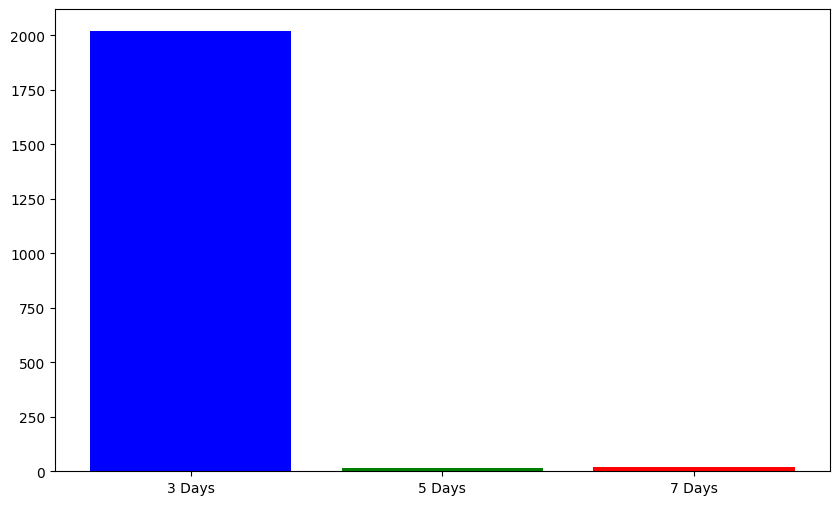

In [11]:
# Plot the average number of bids for each auction type
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the average number of bids for each auction type
auctions_3_days_avg = auctions_3_days.groupby('auctionid').size().reset_index(name='count')
print('3 days:', auctions_3_days_avg)
average_3_days = auctions_3_days_avg['count'].sum()

auctions_5_days_avg = auctions_5_days.groupby('auctionid').size().reset_index(name='count')
print('5 days:', auctions_5_days_avg)
average_5_days = auctions_5_days_avg['count'].mean()

auctions_7_days_avg = auctions_7_days.groupby('auctionid').size().reset_index(name='count')
print('7 days:', auctions_7_days_avg)
average_7_days = auctions_7_days_avg['count'].mean()

axs.bar('3 Days', average_3_days, color='blue', label=f'3 Days ({average_3_days:.2f})')
axs.bar('5 Days', average_5_days, color='green', label=f'5 Days ({average_5_days:.2f})')
axs.bar('7 Days', average_7_days, color='red', label=f'7 Days ({average_7_days:.2f})')


In [12]:
auctions_3_days = auctions_3_days.dropna()

In [13]:
auctions_3_days_len = len(auctions_3_days.groupby('auctionid'))
auctions_3_days
auctions_3_days_len

148

In [14]:
auctions_5_days = auctions_5_days.dropna()

In [15]:
# Count len as distinct number of auctionids
auctions_5_days_len = len(auctions_5_days.groupby('auctionid'))
auctions_5_days
auctions_5_days_len

96

In [16]:
auctions_7_days_len = len(auctions_7_days.groupby('auctionid'))
auctions_7_days = auctions_7_days.dropna()
auctions_7_days_len

383

In [17]:
auctions_3_days.loc[:, 'bidtime'] = auctions_3_days['bidtime'].round(1)
auctions_3_days = auctions_3_days.groupby('bidtime').size().reset_index(name='count')
auctions_5_days.loc[:, 'bidtime'] = auctions_5_days['bidtime'].round(1)
auctions_5_days = auctions_5_days.groupby('bidtime').size().reset_index(name='count')
auctions_7_days.loc[:, 'bidtime'] = auctions_7_days['bidtime'].round(1)
auctions_7_days = auctions_7_days.groupby('bidtime').size().reset_index(name='count')

In [18]:
auctions_3_days

,bidtime,count
0,0.0,22
1,0.1,60
2,0.2,48
3,0.3,37
4,0.4,35
5,0.5,59
6,0.6,39
7,0.7,36
8,0.8,51
9,0.9,47


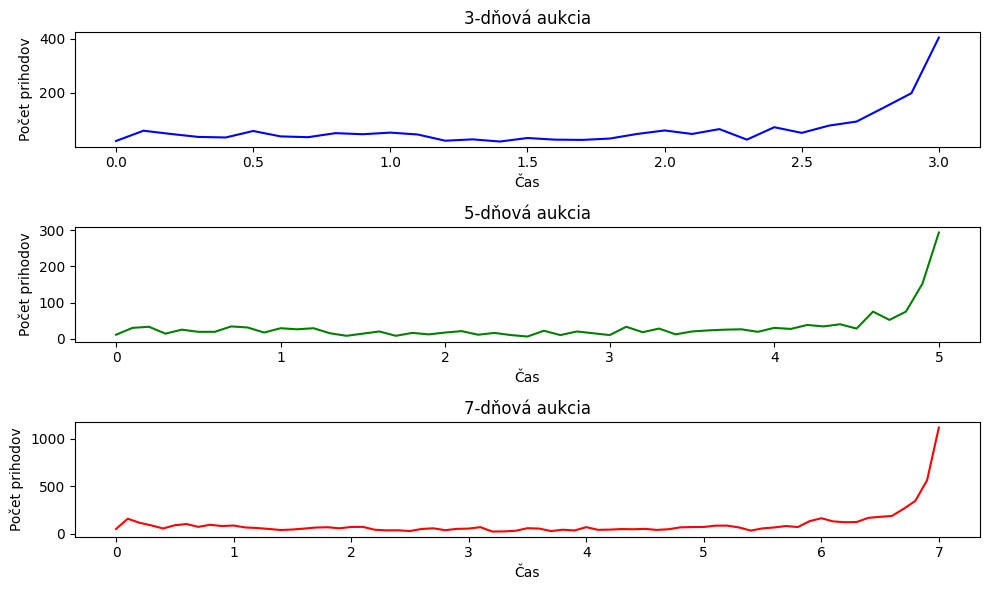

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].plot(auctions_3_days['bidtime'], auctions_3_days['count'], color='blue')
axs[0].set_xlabel('Čas')
axs[0].set_ylabel('Počet prihodov')
axs[0].set_title('3-dňová aukcia')

# Plot 5-day auctions
axs[1].plot(auctions_5_days['bidtime'], auctions_5_days['count'], color='green')
axs[1].set_xlabel('Čas')
axs[1].set_ylabel('Počet prihodov')
axs[1].set_title('5-dňová aukcia')

# Plot 7-day auctions
axs[2].plot(auctions_7_days['bidtime'], auctions_7_days['count'], color='red')
axs[2].set_xlabel('Čas')
axs[2].set_ylabel('Počet prihodov')
axs[2].set_title('7-dňová aukcia')

plt.tight_layout()
plt.show()

### Normalization of the data
There are multiple types of auctions and also the dataset contains different amounts of these types. 

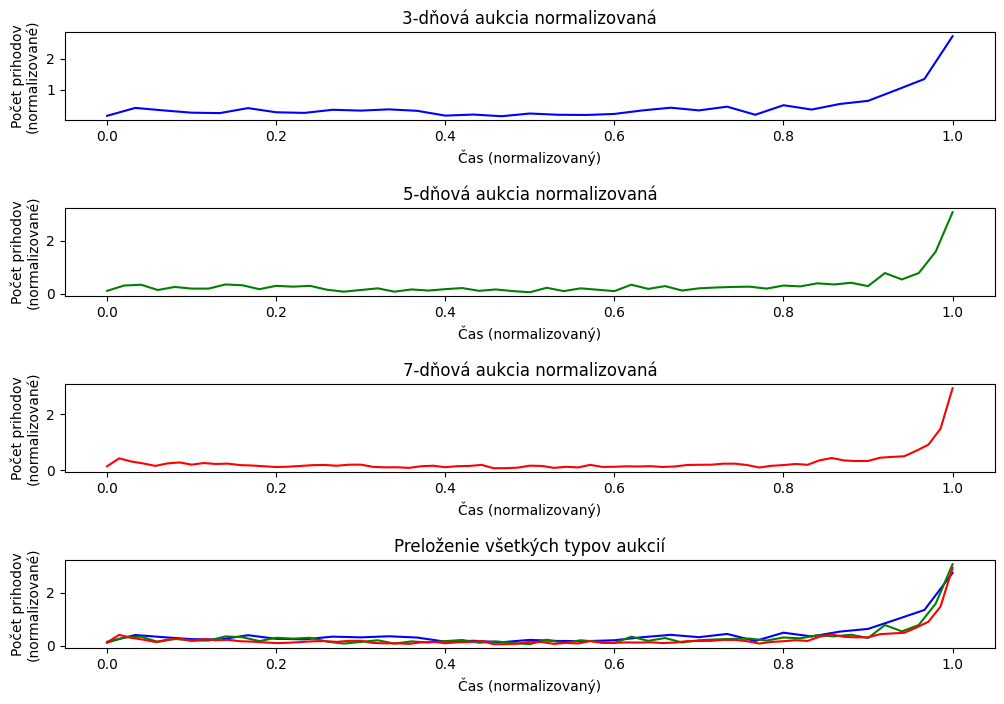

In [20]:
fig, axs = plt.subplots(4, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=1)

# Plot 3-day auctions
axs[0].plot(auctions_3_days['bidtime'] / 3.0, auctions_3_days['count'] / auctions_3_days_len, color='blue')
axs[0].set_xlabel('Čas (normalizovaný)')
axs[0].set_ylabel('Počet prihodov\n(normalizované)')
axs[0].set_title('3-dňová aukcia normalizovaná')

# Plot 5-day auctions
axs[1].plot(auctions_5_days['bidtime'] / 5.0, auctions_5_days['count'] / auctions_5_days_len, color='green')
axs[1].set_xlabel('Čas (normalizovaný)')
axs[1].set_ylabel('Počet prihodov\n(normalizované)')
axs[1].set_title('5-dňová aukcia normalizovaná')

# Plot 7-day auctions
axs[2].plot(auctions_7_days['bidtime'] / 7.0, auctions_7_days['count'] / auctions_7_days_len, color='red')
axs[2].set_xlabel('Čas (normalizovaný)')
axs[2].set_ylabel('Počet prihodov\n(normalizované)')
axs[2].set_title('7-dňová aukcia normalizovaná')

# Plot all auctions combined
axs[3].plot(auctions_3_days['bidtime'] / 3.0, auctions_3_days['count'] / auctions_3_days_len, color='blue', label='3 dňové aukcie')
axs[3].plot(auctions_5_days['bidtime'] / 5.0, auctions_5_days['count'] / auctions_5_days_len, color='green', label='5 dňové aukcie')
axs[3].plot(auctions_7_days['bidtime'] / 7.0, auctions_7_days['count'] / auctions_7_days_len, color='red', label='7 dňové aukcie')
axs[3].set_xlabel('Čas (normalizovaný)')
axs[3].set_ylabel('Počet prihodov\n(normalizované)')
axs[3].set_title('Preloženie všetkých typov aukcií')
# legend = axs[3].legend(loc='upper center', bbox_to_anchor=(0.5, 1))
# legend.set_title('Dĺžka aukcie')
# Remove legend
axs[3].legend().remove()

plt.show()
